# **Imports**

In [ ]:
import tensorflow as tf
from numpy.random import seed
seed(88)
tf.random.set_seed(404)

import itertools
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Input

from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard

from time import strftime
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
import os
import numpy as np
import keras
from keras.datasets import cifar10

%autosave 60

Autosaving every 60 seconds


# **Constants**

In [ ]:
log_dir = 'Tensorboard_logs/'

label_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Sheep', 'Truck']
nr_classes = 10

In [ ]:
image_width = 32
image_height = 32
image_pixels = image_width * image_height
image_channels = 3
total_inputs = image_pixels * image_channels

validation_dataset = 10000

 # **Get the data**

In [ ]:
(x_train_data, y_train_data),(x_test, y_test) =cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
type(x_train_data)

numpy.ndarray

# **Explore the data**

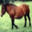

In [ ]:
# Explore the data with IPython display
pic = array_to_img(x_train_data[7])
display(pic)

In [ ]:
y_train_data[7][0]

np.uint8(7)

In [ ]:
label_names[y_train_data[7][0]]

'Horse'

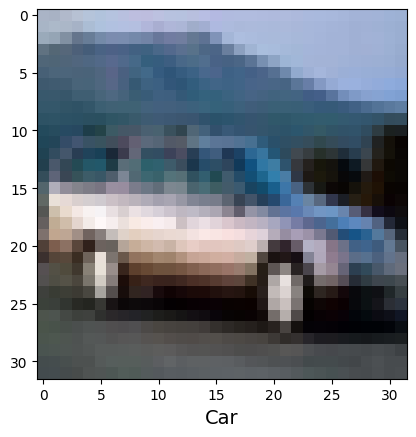

In [ ]:
plt.imshow(x_train_data[4])
plt.xlabel(label_names[y_train_data[4][0]], fontsize = '14')
plt.show()

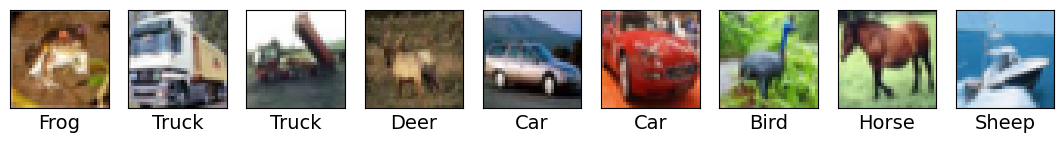

In [ ]:
plt.figure(figsize=(15,5))
for i in range(9):
    plt.subplot(1, 10 , i+1)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(x_train_data[i])
    plt.xlabel(label_names[y_train_data[i][0]], fontsize='14')
plt.show()

In [ ]:
nr_images, x, y, c = x_train_data.shape
print(f'images = {nr_images} \t| width = {x}\t| height = {y} \t| channels = {c}')

images = 50000 	| width = 32	| height = 32 	| channels = 3


# **Preprocessing**

In [ ]:
#dividing by 255.0 for small leraning rate
x_train_data, x_test = x_train_data/255.0, x_test/255.0

In [ ]:
type(x_train_data[0][0][0][0])

numpy.float64

In [ ]:
x_train_data = x_train_data.reshape(x_train_data.shape[0], total_inputs)
x_test = x_test.reshape(x_test.shape[0], total_inputs)

#**Creating Validation Dataset**

In [ ]:
x_val = x_train_data[:validation_dataset]
y_val = y_train_data[:validation_dataset]
x_val.shape

(10000, 3072)

# **A small dataset (For Illustration)**

In [ ]:
x_train = x_train_data[validation_dataset:]
y_train = y_train_data[validation_dataset:]

# **Define the Neural Network using Keras**

In [ ]:

model_1 = Sequential([
    Input(shape=(total_inputs,)),
    Dense(128, activation='relu', name='m1_hidden1'),
    Dense(64, activation='relu', name='m1_hidden2'),
    Dense(16, activation='relu', name='m1_hidden3'),
    Dense(10, activation='softmax', name= 'ml_output'),
])

model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
model_2 = Sequential([
    Input(shape=(total_inputs,)),
    Dropout(0.2, seed=42),
    Dense(128, activation='relu', name='hidden1'),
    Dense(64, activation='relu', name='hidden2'),
    Dense(16, activation='relu', name='hidden3'),
    Dense(10, activation='softmax', name='output')
])

model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
model_3 = Sequential([
    Input(shape=(total_inputs,)),
    Dropout(0.2, seed=42),
    Dense(128, activation='relu', name='hidden1'),
    Dropout(0.25, seed=42),
    Dense(64, activation='relu', name='hidden2'),
    Dense(16, activation='relu', name='hidden3'),
    Dense(10, activation='softmax', name='output')
])

model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
type(model_1)

keras.src.models.sequential.Sequential

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ m1_hidden1 (Dense)              │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ m1_hidden2 (Dense)              │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ m1_hidden3 (Dense)              │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ml_output (Dense)               │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,810 (1.54 MB)

 Trainable params: 402,810 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

# ***TensorBoard***

In [ ]:
def get_tensorboard(model_name):

  folder_name = f'{model_name} at {strftime("%I %M")}'
  dir_paths = os.path.join(log_dir, folder_name)

  try:
    os.makedirs(dir_paths)
  except OSError as err:
    print(err.strerror)
  # Removed the else block to always return the TensorBoard object
  return TensorBoard(log_dir=dir_paths)

# Fit the **model**

In [ ]:
samples_per_batch = 1000

In [ ]:
%%time
nr_epochs = 100
model_1.fit(x_train_data, y_train_data,batch_size=samples_per_batch,
            epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 1 XL')],
            verbose = 0,
            validation_data = (x_val, y_val)
            )

CPU times: user 6min 51s, sys: 27.1 s, total: 7min 18s
Wall time: 4min 53s


In [ ]:
# %%time
# nr_epochs = 100
# model_2.fit(x_train_data, y_train_data,batch_size=samples_per_batch,
#             epochs=nr_epochs,
#             callbacks=[get_tensorboard('Model 2 Xl')],
#             verbose = 0,
#             validation_data = (x_val, y_val)
#             )

CPU times: user 9min 57s, sys: 22.5 s, total: 10min 20s
Wall time: 7min 11s


In [ ]:
# %%time
# nr_epochs = 100
# model_3.fit(x_train_data, y_train_data,batch_size=samples_per_batch,
#             epochs=nr_epochs,
#             callbacks=[get_tensorboard('Model 3 XL')],
#             verbose = 0,
#             validation_data = (x_val, y_val)
#             )

KeyboardInterrupt: 

# **Predictions on Individual Images**

# **Tensorboard**

In [ ]:
x_val.shape

(10000, 3072)

In [ ]:
#we are making it 2 dimensions beacuse predict provides more than one prediction
test = np.expand_dims(x_val[0] , axis = 0)
test.shape

(1, 3072)

In [ ]:
np.set_printoptions(precision=3)

In [ ]:
model_2.predict(test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[0.008, 0.003, 0.094, 0.146, 0.101, 0.062, 0.565, 0.019, 0.001,
        0.002]], dtype=float32)

In [ ]:
model_2.predict(x_val).shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


(10000, 10)

In [ ]:
# Get probability predictions
predictions = model_2.predict(test)

# Convert to class indices
classes = np.argmax(predictions, axis=1)
print("Predicted classes:", classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted classes: [6]


In [ ]:
y_val[0]

array([6], dtype=uint8)

In [ ]:
for number in range(10):
  test_img = np.expand_dims(x_val[number] , axis = 0)
  predictions = model_2.predict(test_img)[0]
  predicted_val = np.argmax(predictions, axis=0)
  print(f'the Actual value {y_val[number]} vs the predicted value {predicted_val}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
the Actual value [6] vs the predicted value 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
the Actual value [9] vs the predicted value 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
the Actual value [9] vs the predicted value 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
the Actual value [4] vs the predicted value 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
the Actual value [1] vs the predicted value 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
the Actual value [1] vs the predicted value 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
the Actual value [2] vs the predicted value 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
the Actual value [7] vs the predicted value 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
the Actual value [8] vs the predicted value 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
the Actual value [3] vs the predicted value 7


In [ ]:
#  %load_ext tensorboard

# %tensorboard --logdir /content/Tensorboard_logs

# **Evaluation**

In [ ]:
model_1.metrics_names

['loss', 'compile_metrics']

In [ ]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5035 - loss: 1.3811


# **Confusion Matrix**


In [ ]:
# Use np.argmax to get the predicted classes from the predictions
predictions = model_2.predict(x_test)
pred = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)
print(conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[567  18  66  23  44  11  14  36 174  47]
 [ 44 511  15  35  20   6  10  28 118 213]
 [ 68  10 321  78 227  88  77  91  21  19]
 [ 30  13  81 276  82 247 109  86  24  52]
 [ 43   9 107  52 485  41 100 117  31  15]
 [ 23   5  87 204  87 380  59 105  23  27]
 [  7  11  67 101 157  56 535  34  15  17]
 [ 39   7  37  51  85  70  15 636  19  41]
 [ 90  42  11  39  23  12   6  25 691  61]
 [ 30 126  10  31  17  16  24  62  91 593]]


In [ ]:
nr_rows = conf_matrix.shape[0]
nr_columns = conf_matrix.shape[1]

In [ ]:
conf_matrix.max()

np.int64(691)

In [ ]:
conf_matrix.min()

np.int64(5)

In [ ]:
conf_matrix[0]

array([567,  18,  66,  23,  44,  11,  14,  36, 174,  47])

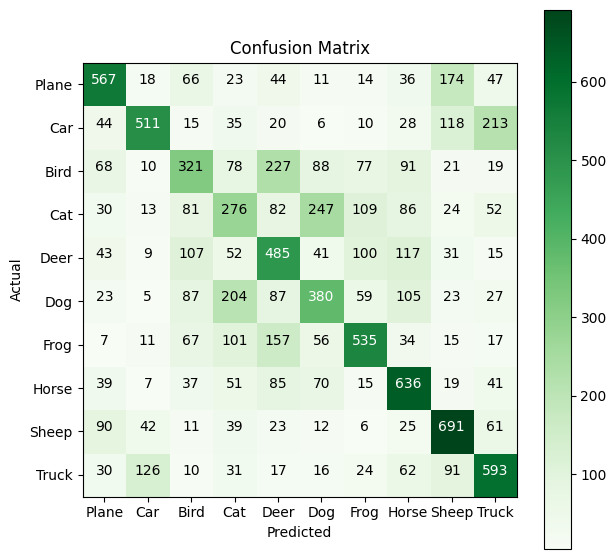

In [ ]:
plt.figure(figsize=(7,7))
plt.imshow(conf_matrix , cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()

ticks_marks = np.arange(nr_classes)
plt.yticks(ticks_marks, label_names)
plt.xticks(ticks_marks, label_names)

for i, j in itertools.product(range(nr_rows), range(nr_columns)):
  plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',
           color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')



plt.show()

In [ ]:
# # true positive are along the diagnol
# false postive are along the columns
# false negative are along the rows

recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)

In [ ]:
avg_recall = np.mean(recall)
average_precision_score = np.mean(precision)

print(f'Average Recall = {avg_recall:.2%}')
print(f'Average Precision = {average_precision_score:.2%}')

Average Recall = 49.95%
Average Precision = 50.02%


In [ ]:
f1_score = 2*(average_precision_score*avg_recall)/(average_precision_score+avg_recall)
print(f'F1 Score = {f1_score:.2%}')

F1 Score = 49.98%
